# Problem
Facebook has changed the method to bid from maximum bidding to average bidding. And our company wants to know if there is really a difference between them to understand if average bidding really is more beneficial.
<br />
**Note!!!**
<br />
**Success criteria**: "purchase" values so you have to focus on just purchase value.

There are two groups in the excel sheet
1. Control Group - Applied Maximum Bidding
2. Test Group - Applied Average Bidding

### **Question: Are there any difference in purchasing for two groups?**  

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, \
    pearsonr, spearmanr, kendalltau, f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest

In [91]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Task 1: Prepare and Analyze Data

In [92]:
xls = pd.ExcelFile('ab_testing.xlsx')
control_df = pd.read_excel(xls, 'Control Group')
test_df = pd.read_excel(xls, 'Test Group')

## Step 1: Analyze Control and Test Groups

In [93]:
control_df.head()

,Impression,Click,Purchase,Earning
0,82529.45927,6090.07732,665.21125,2311.27714
1,98050.45193,3382.86179,315.08489,1742.80686
2,82696.02355,4167.96575,458.08374,1797.82745
3,109914.40040,4910.88224,487.09077,1696.22918
4,108457.76263,5987.65581,441.03405,1543.72018


In [94]:
test_df.head()

,Impression,Click,Purchase,Earning
0,120103.50380,3216.54796,702.16035,1940.00000
1,134775.94336,3635.08242,834.05429,2929.00000
2,107806.62079,3057.14356,422.93426,2526.00000
3,116445.27553,4650.47391,429.03353,2281.00000
4,145082.51684,5201.38772,749.86044,2781.69752


In [95]:
def check_df(dataframe, count=5):
    print("--------------------- Shape ---------------------")
    print(dataframe.shape)
    print("--------------------- Types ---------------------")
    print(dataframe.dtypes)
    print("--------------------- Head ---------------------")
    print(dataframe.head(count))
    print("--------------------- Tail ---------------------")
    print(dataframe.tail(count))
    print("--------------------- NA ---------------------")
    print(dataframe.isnull().sum())
    print("-------------------- Quantiles ---------------------")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [96]:
df = control_df.copy()
df["type"] = "control"
df1 = test_df.copy()
df1["type"] = "test"

In [97]:
check_df(df)

--------------------- Shape ---------------------
(40, 5)
--------------------- Types ---------------------
Impression    float64
Click         float64
Purchase      float64
Earning       float64
type           object
dtype: object
--------------------- Head ---------------------
    Impression      Click  Purchase    Earning     type
0  82529.45927 6090.07732 665.21125 2311.27714  control
1  98050.45193 3382.86179 315.08489 1742.80686  control
2  82696.02355 4167.96575 458.08374 1797.82745  control
3 109914.40040 4910.88224 487.09077 1696.22918  control
4 108457.76263 5987.65581 441.03405 1543.72018  control
--------------------- Tail ---------------------
     Impression      Click  Purchase    Earning     type
35 132064.21900 3747.15754 551.07241 2256.97559  control
36  86409.94180 4608.25621 345.04603 1781.35769  control
37 123679.00000 3649.07379 476.16813 2187.72122  control
38 101997.49410 4736.35337 474.61354 2254.56383  control
39 121085.88122 4285.17861 590.40602 1289.30895  

In [98]:
check_df(df1)

--------------------- Shape ---------------------
(40, 5)
--------------------- Types ---------------------
Impression    float64
Click         float64
Purchase      float64
Earning       float64
type           object
dtype: object
--------------------- Head ---------------------
    Impression      Click  Purchase    Earning  type
0 120103.50380 3216.54796 702.16035 1940.00000  test
1 134775.94336 3635.08242 834.05429 2929.00000  test
2 107806.62079 3057.14356 422.93426 2526.00000  test
3 116445.27553 4650.47391 429.03353 2281.00000  test
4 145082.51684 5201.38772 749.86044 2781.69752  test
--------------------- Tail ---------------------
     Impression      Click  Purchase    Earning  type
35  79234.91193 6002.21358 382.04712 2277.86398  test
36 130702.23941 3626.32007 449.82459 2530.84133  test
37 116481.87337 4702.78247 472.45373 2597.91763  test
38  79033.83492 4495.42818 425.35910 2595.85788  test
39 102257.45409 4800.06832 521.31073 2967.51839  test
--------------------- NA ---

## Step 2: Concat Control and Test Groups

In [99]:
df = pd.concat([df,df1])

In [100]:
df  = df.reset_index()

In [101]:
check_df(df)

--------------------- Shape ---------------------
(80, 6)
--------------------- Types ---------------------
index           int64
Impression    float64
Click         float64
Purchase      float64
Earning       float64
type           object
dtype: object
--------------------- Head ---------------------
   index   Impression      Click  Purchase    Earning     type
0      0  82529.45927 6090.07732 665.21125 2311.27714  control
1      1  98050.45193 3382.86179 315.08489 1742.80686  control
2      2  82696.02355 4167.96575 458.08374 1797.82745  control
3      3 109914.40040 4910.88224 487.09077 1696.22918  control
4      4 108457.76263 5987.65581 441.03405 1543.72018  control
--------------------- Tail ---------------------
    index   Impression      Click  Purchase    Earning  type
75     35  79234.91193 6002.21358 382.04712 2277.86398  test
76     36 130702.23941 3626.32007 449.82459 2530.84133  test
77     37 116481.87337 4702.78247 472.45373 2597.91763  test
78     38  79033.83492 449

# Task 2: Define AB Testing Hypothesis

## Step 1: Define Hypothesis
**H0 : M1 = M2**<br> 
**H1 : M1!= M2**
<br>
H0 : There is no difference between maximum and average bidding<br>
H1 : There is difference between maximum and average bidding

## Step 2: Observe Purchase for Control and Test

In [102]:
df.groupby("type").agg({"Purchase": "mean"})

,Purchase
type,
control,550.89406
test,582.10610


In [103]:
for k,i in df.items():
    print(df[k])

0      0
1      1
2      2
3      3
4      4
      ..
75    35
76    36
77    37
78    38
79    39
Name: index, Length: 80, dtype: int64
0     82529.45927
1     98050.45193
2     82696.02355
3    109914.40040
4    108457.76263
         ...     
75    79234.91193
76   130702.23941
77   116481.87337
78    79033.83492
79   102257.45409
Name: Impression, Length: 80, dtype: float64
0    6090.07732
1    3382.86179
2    4167.96575
3    4910.88224
4    5987.65581
        ...    
75   6002.21358
76   3626.32007
77   4702.78247
78   4495.42818
79   4800.06832
Name: Click, Length: 80, dtype: float64
0    665.21125
1    315.08489
2    458.08374
3    487.09077
4    441.03405
        ...   
75   382.04712
76   449.82459
77   472.45373
78   425.35910
79   521.31073
Name: Purchase, Length: 80, dtype: float64
0    2311.27714
1    1742.80686
2    1797.82745
3    1696.22918
4    1543.72018
        ...    
75   2277.86398
76   2530.84133
77   2597.91763
78   2595.85788
79   2967.51839
Name: Earning, Lengt

<AxesSubplot:xlabel='type'>

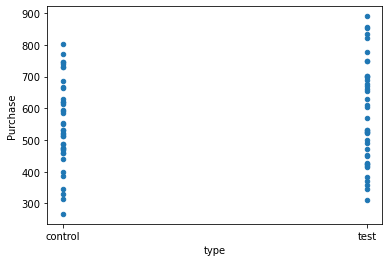

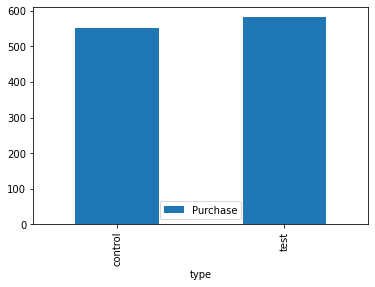

In [104]:
df.plot.scatter("type", "Purchase")
plot_df = df.groupby("type").agg({"Purchase": "mean"})
plot_df.plot.bar()

# Task 3: Control "Assumption of Normality" and "Homogeneity of Variance"

**Assumption of Normality :**<br>
H0: Normal distribution assumption is assured. <br>
H1: Normal distribution assumption is not assured.<br>
p < 0.05 H0 **REJECT** , p > 0.05 H0 **CAN NOT REJECT** <br>
Look at the results and tell if assumption of normality be assured by the two groups upon the p-values that you have.

In [105]:
test_stat, pvalue = shapiro(df.loc[df["type"] == "control", "Purchase"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.9773, p-value = 0.5891


In [106]:
test_stat, pvalue = shapiro(df.loc[df["type"] == "test", "Purchase"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.9589, p-value = 0.1541


H0 is accepted for both groups becuase p-values are greater than 0.05. So, assumption of normality is assured. Now we should look at 

**Homogeneity of variance:**<br>
H0: Variance is homogene.<br>
H1: Variance is not homogene.<br>
p < 0.05 H0 **REJECT** , p > 0.05 H0 **CAN NOT REJECT** <br>
Kontrol ve test grubu için varyans homojenliğinin sağlanıp sağlanmadığını Purchase değişkeni üzerinden test ediniz. <br>
Test sonucuna göre normallik varsayımı sağlanıyor mu? Elde edilen p-value değerlerini yorumlayınız. 

In [107]:
test_stat, pvalue = levene(df.loc[df["type"] == "control", "Purchase"],
                           df.loc[df["type"] == "test", "Purchase"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 2.6393, p-value = 0.1083


**0.0649 > 0.05 then homogenity of varience can not be rejected.**

#### Hypothesis are not rejected for both of them. Then we can use **"ttest_ind"**.

In [108]:
test_stat, pvalue = ttest_ind(df.loc[df["type"] == "control", "Purchase"],
                              df.loc[df["type"] == "test", "Purchase"],
                              equal_var=True)
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))                     

Test Stat = -0.9416, p-value = 0.3493


0.2912 > 0.05 we could not reject H0. As a result there is no significant difference for both methods in regard of "purchase" values. 

# Result

#### **Recommendation:** There is no need to change the method if you just value purchase parameter. But to look other parameters can also be benefical for company's future such as click, earning. Then we can look up if there is any difference and can say this new method is better in these areas.